## What is the most optimal skill to learn for Data Analysts

#### Methodology

1. Group skills to determine median salary and liklihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevelant

In [3]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [5]:
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

df_da_us_exploded = df_da_us.explode('job_skills')

df_da_us_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [6]:
df_da_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

da_job_count = len(df_da_us)

df_da_skills['skill_percent'] = df_da_skills['skill_count'] / da_job_count * 100

skill_percent_limit = 5

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent_limit]

df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


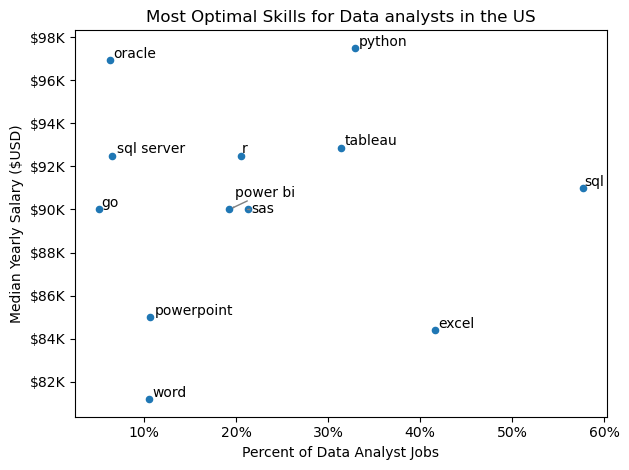

In [7]:
from adjustText import adjust_text


df_da_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
texts = []
for i , txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data analysts in the US')


plt.tight_layout()
plt.show()

In [8]:
df_technology = df['job_type_skills'].copy()

#cleaning the dataframe
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

#combining dictionaries
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['visio',
  'datarobot',
  'microstrategy',
  'ssrs',
  'cognos',
  'dax',
  'ssis',
  'ms access',
  'looker',
  'nuix',
  'spss',
  'powerpoint',
  'spreadsheet',
  'qlik',
  'sharepoint',
  'splunk',
  'outlook',
  'word',
  'sheets',
  'sap',
  'alteryx',
  'sas',
  'esquisse',
  'msaccess',
  'tableau',
  'powerbi',
  'excel',
  'power bi'],
 'programming': ['fortran',
  'vb.net',
  'julia',
  'typescript',
  'golang',
  't-sql',
  'apl',
  'kotlin',
  'bash',
  'python',
  'perl',
  'cobol',
  'elixir',
  'r',
  'swift',
  'php',
  'css',
  'delphi',
  'lua',
  'pascal',
  'go',
  'c++',
  'clojure',
  'nosql',
  'powershell',
  'java',
  'solidity',
  'sql',
  'crystal',
  'c',
  'sas',
  'dart',
  'lisp',
  'ocaml',
  'matlab',
  'groovy',
  'erlang',
  'html',
  'shell',
  'c#',
  'scala',
  'f#',
  'mongodb',
  'mongo',
  'sass',
  'no-sql',
  'objective-c',
  'rust',
  'visualbasic',
  'assembly',
  'vba',
  'ruby',
  'haskell',
  'javascript',
  'visual ba

In [10]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,visio
0,analyst_tools,datarobot
0,analyst_tools,microstrategy
0,analyst_tools,ssrs
0,analyst_tools,cognos
...,...,...
9,sync,twilio
9,sync,symphony
9,sync,mattermost
9,sync,zoom


In [12]:
df_plot = df_da_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

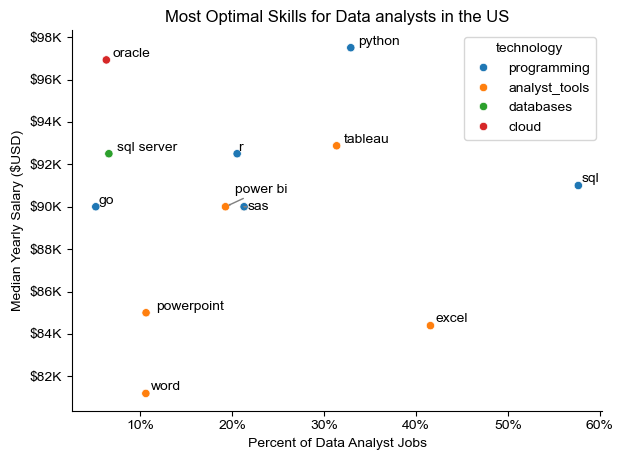

In [17]:
from adjustText import adjust_text


#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

texts = []
for i , txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
sns.despine()
sns.set_theme(style='ticks')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data analysts in the US')


plt.tight_layout()
plt.show()